<a href="https://colab.research.google.com/github/sabamontazeri/machine-learning-course/blob/main/abbaszade_first_question_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-learn==1.3.1



In [21]:
from sklearn.datasets import load_iris
import pandas as pd
data = load_iris()
data.target[[0,1,2]]
Data = pd.DataFrame(data=data.data,
                  columns=data.feature_names)
Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(Data)
Data=scaler.transform(Data)
Data=pd.DataFrame(data=Data,
                  columns=data.feature_names)
Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [25]:
from sklearn.model_selection import train_test_split
X=data.data
y=data.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42,shuffle=True)

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
ada = AdaBoostClassifier(
                                n_estimators=300,
                                random_state = 42,
                                )
params = {'n_estimators': [200,300,400]}
grid_ada = GridSearchCV(ada, params, cv=3,scoring='accuracy')
grid_ada.fit(X_train, y_train.ravel())
pred_train=grid_ada.predict(X_train)
pred_test=grid_ada.predict(X_test)




Cross Validation Scores:  0.9603174603174603


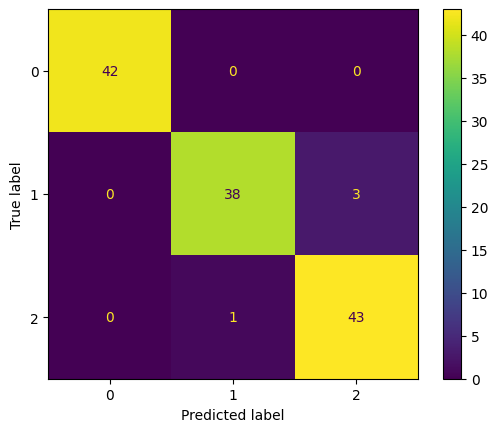

In [50]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
scores = cross_val_score(grid_ada, X_train, y_train, cv =3,scoring="accuracy")
print("Cross Validation Scores: ", scores.mean())


confusion_matrix = confusion_matrix(y_train, pred_train)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix ,display_labels=['0','1','2'])

cm_display.plot()
plt.show()


In [69]:
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier(max_depth=1,max_leaf_nodes=2)
params = { 'max_leaf_nodes': [2,3]}
grid = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, verbose=0, cv=5,)
grid.fit(X_train ,y_train)
treepred_train=grid.predict(X_train)
treepred_test=grid.predict(X_test)
scores = cross_val_score(clf, X_train, y_train, cv =3,scoring="accuracy")
print("Cross Validation Scores: ", scores.mean())

print("accuracy of train:%f" %accuracy_score(y_train,treepred_train))
print("accuracy of test:%f" %accuracy_score(y_test,treepred_test))




Cross Validation Scores:  0.67718715393134
accuracy of train:0.952756
accuracy of test:1.000000
